In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

In [2]:
data = pd.read_csv('housePrice.csv')
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [3]:
data['Parking'].replace(['True', 'False'], [1, 0], inplace=True)
data['Parking'].replace(['True', 'False'], [1, 0], inplace=True)
data['Parking'].replace(['True', 'False'], [1, 0], inplace=True)
data.head()


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
data.drop('Address', axis=1, inplace=True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
0,63,1,True,True,True,1.850000e+09,61666.67
1,60,1,True,True,True,1.850000e+09,61666.67
2,79,2,True,True,True,5.500000e+08,18333.33
3,95,2,True,True,True,9.025000e+08,30083.33
4,123,2,True,True,True,7.000000e+09,233333.33


In [5]:
data.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
Area,1.000000,0.672959,0.197698,0.076829,0.052384,0.722647,0.722647
Room,0.672959,1.000000,0.274952,0.129956,0.181718,0.567610,0.567610
Parking,0.197698,0.274952,1.000000,0.430804,0.430893,0.190532,0.190532
Warehouse,0.076829,0.129956,0.430804,1.000000,0.201921,0.109971,0.109971
Elevator,0.052384,0.181718,0.430893,0.201921,1.000000,0.111861,0.111861
Price,0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000
Price(USD),0.722647,0.567610,0.190532,0.109971,0.111861,1.000000,1.000000


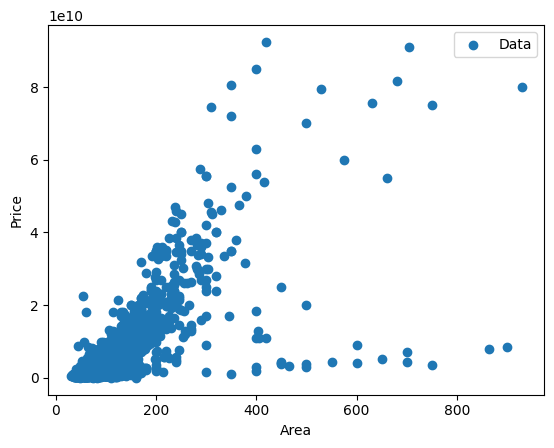

In [7]:
plt.scatter(data['Area'], data['Price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend(['Data'])
plt.show()

In [8]:
X = np.array(data[['Area']]) # 2 braket instade of reshape
Y = np.array(data[['Price']])

print(X.shape)
print(Y.shape)

(3473, 1)
(3473, 1)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2604, 1)
(2604, 1)
(869, 1)
(869, 1)


In [10]:
lls = LinearLeastSquare()
lls.fit(X_train,  Y_train)

Y_pred = lls.predict(X_test)

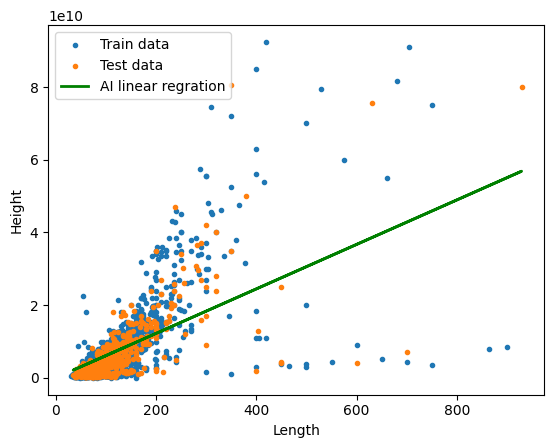

In [11]:
plt.scatter(X_train, Y_train, marker='.')
plt.scatter(X_test, Y_test, marker='.')
plt.plot(X_test, Y_pred, color='green', lw=2)

plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['Train data', 'Test data', 'AI linear regration', 'Manual linear regression'], loc= 'upper left')
plt.show()

In [12]:
lls.evaluate(X_test, Y_test, 'mae')

3199505431.095184